# Data Science Code Cheat Sheet

## Index
[1. Dataset](#1.-Dataset) <br>
[2. Regression](#2.-Regression) <br>
&emsp;[2.1 Exploratory Data Analysis & Unsupervised Methods](#2.1-Exploratory-Data-Analysis-&-Unsupervised-Methods) <br>
&emsp;[2.2 Data Splitting and Preprocessing](#2.2-Data-Splitting-and-Preprocessing) <br>
&emsp;[2.3 Evaluation Metrics](#2.3-Evaluation-Metrics) <br>
&emsp;[2.4 Regressors](#2.4-Regressors) (Linear Regression, Lasso, Random Forest, XGBoost, Neural Network)<br>
[3. Classification](#3.-Classification) <br>
&emsp;[3.1 Exploratory Data Analysis & Unsupervised Methods](#3.1-Exploratory-Data-Analysis-&-Unsupervised-Methods) (clustering, PCA, autoencoder) <br>
&emsp;[3.2 Data Splitting and Preprocessing](#3.2-Data-Splitting-and-Preprocessing) <br>
&emsp;[3.3 Evaluation Metrics](#3.3-Evaluation-Metrics) <br>
&emsp;[3.4 Classifiers](#3.4-Classifiers) (Random Forest, XGBoost, Neural Network)<br>

In [1]:
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
import seaborn as sns

[scroll to top](#Data-Science-Code-Cheat-Sheet)

[1.1](#section-title)

In [2]:
# -1. CUSTOM FUNCTIONS

def plot_losses(history): # neural network training history plotter
    
    loss = np.array(history['loss'])
    val_loss = np.array(history['val_loss'])
    log_loss = np.log(loss)
    log_val_loss = np.log(val_loss)
    epochs = np.array(range(1, len(loss) + 1))

    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    axs[0].plot(epochs, loss, label='training loss')
    axs[0].plot(epochs, val_loss, label='validation loss')
    axs[0].legend(loc='upper right')
    axs[0].set_xlabel('epoch')

    axs[1].plot(epochs, log_loss, label='training log loss')
    axs[1].plot(epochs, log_val_loss, label='validation log loss')
    axs[1].legend(loc='upper right')
    axs[1].set_xlabel('epoch')
    plt.show()

## 1. Dataset

In [3]:
from sklearn.datasets import fetch_california_housing
cali_import = fetch_california_housing()
X = pd.DataFrame(cali_import['data'], columns=cali_import['feature_names'])
X['CatNoise'] = np.random.choice( # categorical noise
    ['A', 'B', 'C'], 
    size=X.shape[0],
    p=[1/3, 1/3, 1/3])
y = pd.Series(cali_import['target'], name='MedVal')
data = pd.concat([X, y], axis=1)
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,CatNoise,MedVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,B,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,B,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,B,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,C,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,C,3.422
...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,C,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,A,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,C,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,A,0.847


In [4]:
# missing values
rows_mv = data.isnull().any(axis=1)
print('Missing values\n', data.loc[rows_mv,]) # see rows with missing values
data = data.loc[~rows_mv,] # remove missing values

Missing values
 Empty DataFrame
Columns: [MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude, CatNoise, MedVal]
Index: []


## 2. Regression

### 2.1 Exploratory Data Analysis & Unsupervised Methods

In [5]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


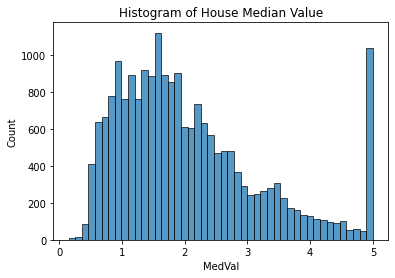

In [6]:
sns.histplot(x=data['MedVal'])
plt.title('Histogram of House Median Value')
plt.xlabel('MedVal')
plt.show()

In [7]:
def col_decomp(df, target): # separate continuous, binary and categorical features

    dtypes = df.dtypes
    decomp = {'target': target, 'features': [col for col in df.columns if col != target],
              'continuous': [], 'categorical': [], 'binary': [], 'others': []}
              
    for c in decomp['features']:
        if dtypes[c] in ('float64', 'int64'):
            uniques_set = set(df[c].unique())
            if uniques_set == set([0, 1]):
                decomp['binary'].append(c)
            else:
                decomp['continuous'].append(c)
        elif dtypes[c] == 'object':
            decomp['categorical'].append(c)
        else:
            decomp['others'].append(c)

    return decomp

decomp = col_decomp(data, target='MedVal')
print(decomp)

{'target': 'MedVal', 'features': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'CatNoise'], 'continuous': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'categorical': ['CatNoise'], 'binary': [], 'others': []}


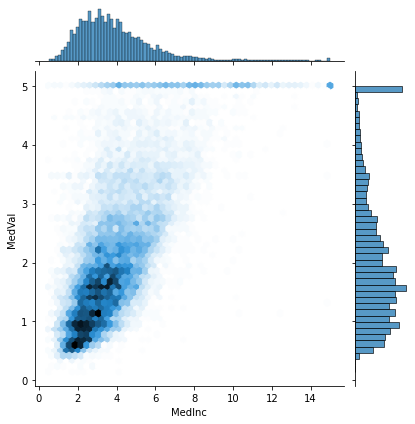

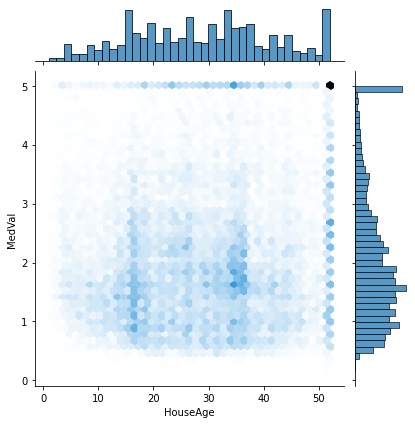

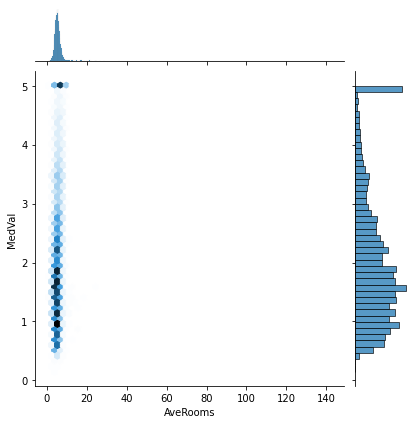

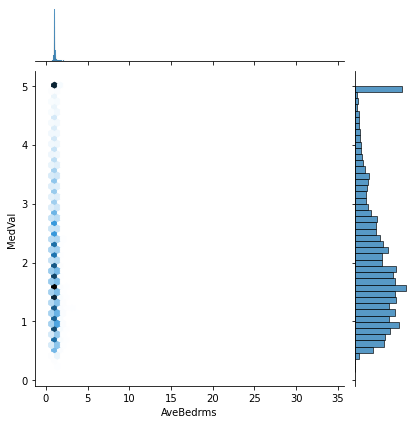

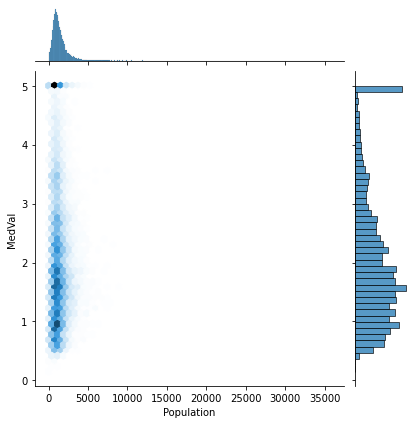

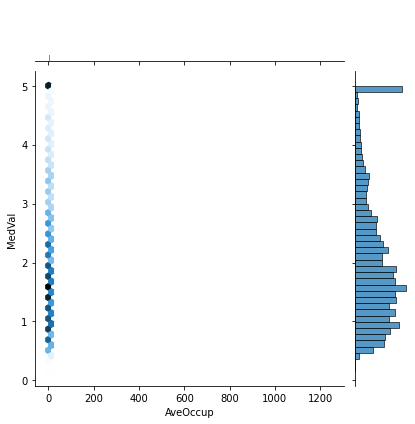

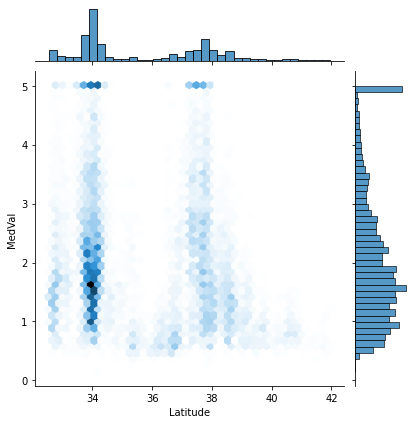

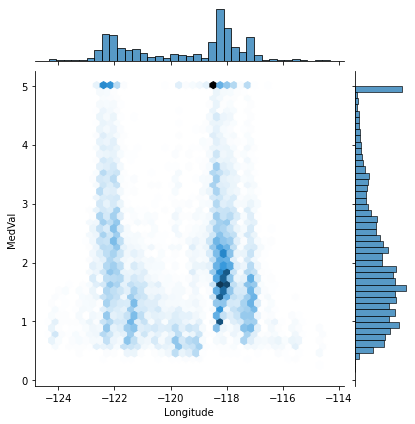

In [8]:
for c in decomp['continuous']:
    sns.jointplot(x=X[c], y=y, kind='hex')
    plt.show()
# use kind='hex' when a low opacity scatterplot does not work

In [9]:
for c in decomp['categorical']:
    print(pd.DataFrame(data.groupby(c)[decomp['target']].mean()))

            MedVal
CatNoise          
A         2.059607
B         2.072290
C         2.073745


### 2.2 Data splitting and Preprocessing

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

transformers = [
    ('standard_scaler', StandardScaler(), decomp['continuous']),
    ('ohe', OneHotEncoder(), decomp['categorical']),
    ('passthrough', 'passthrough', decomp['binary']+decomp['others'])]
ct = ColumnTransformer(transformers)
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

### 2.3 Evaluation Metrics

In [11]:
from sklearn import metrics
def reg_evaluate(y_test, y_pred):

    # true vs predicted plot
    fig, ax = plt.subplots()
    ax.scatter(y_test, y_pred, s=10)
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()])]  # max of both axes

    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    ax.set_aspect('equal')
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    plt.xlabel('True')
    plt.ylabel('Predicted')
    plt.title('Test set results')
    plt.show()

    # eval metrics
    rec_metrics = dict()
    rec_metrics['R-Squared'] = metrics.r2_score(y_test, y_pred)
    rec_metrics['MAE'] = metrics.mean_absolute_error(y_test, y_pred)
    rec_metrics['MSE'] = metrics.mean_squared_error(y_test, y_pred)

    for m in rec_metrics:
        print(f'{m} = {round(rec_metrics[m], 4)}')

### 2.4 Regressors


Linear Regression


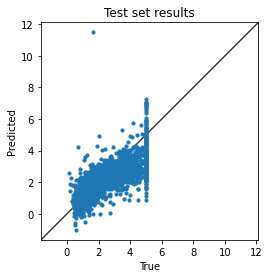

R-Squared = 0.5758
MAE = 0.5332
MSE = 0.5559

Lasso


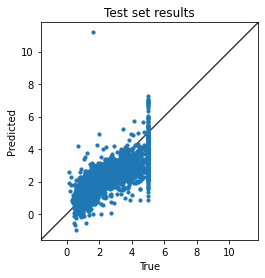

R-Squared = 0.5769
MAE = 0.5331
MSE = 0.5544

Random Forest


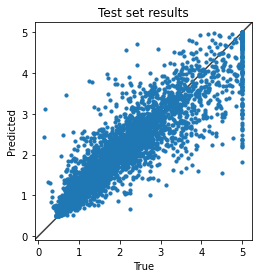

R-Squared = 0.8069
MAE = 0.326
MSE = 0.2531

XGBoost


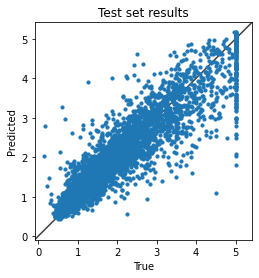

R-Squared = 0.8351
MAE = 0.3063
MSE = 0.2161

Neural Network
Model: "reg_nn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 11)                132       
_________________________________________________________________
dense_1 (Dense)              (None, 22)                264       
_________________________________________________________________
dense_2 (Dense)              (None, 44)                1012      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 45        
Total params: 1,453
Trainable params: 1,453
Non-trainable params: 0
_________________________________________________________________
Training time: 84.0s (1.41m)


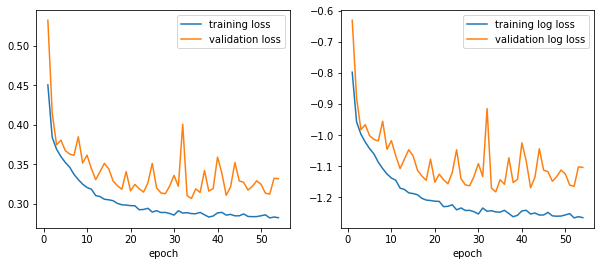

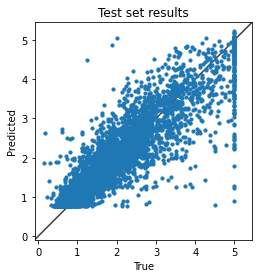

R-Squared = 0.7736
MAE = 0.3744
MSE = 0.2966


In [12]:
print('\nLinear Regression')
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
reg_evaluate(y_test, lr_pred)

print('\nLasso')
from sklearn.linear_model import LassoCV
lasso = LassoCV(cv=5)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
reg_evaluate(y_test, lasso_pred)

print('\nRandom Forest')
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200, criterion='squared_error')
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
reg_evaluate(y_test=y_test, y_pred=rf_pred)

#todo add lightgbm

print('\nXGBoost')
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV 

param_grid = {
    'gamma': [0.1, 0.2, 0.3],
    'lambda': [0.4, 0.5, 0.6],
    'learning_rate': [0.1, 0.15, 0.2],
    'max_depth': [8, 10, 12]
    }

xgb = GridSearchCV(
    estimator=XGBRegressor(objective='reg:squarederror'), 
    param_grid=param_grid, cv=5)
xgb.fit(X_train, y_train)
cv_results = pd.DataFrame(xgb.cv_results_)
cv_results.loc[:,
    [c for c in cv_results.columns if c[0:6]=='param_'] +
    ['mean_test_score', 'std_test_score']]
xgb_pred = xgb.predict(X_test)
reg_evaluate(y_test=y_test, y_pred=xgb_pred)

print('\nNeural Network')
from tensorflow.keras import Sequential, layers, optimizers, callbacks

def plot_losses(history):
    
    loss = np.array(history['loss'])
    val_loss = np.array(history['val_loss'])
    log_loss = np.log(loss)
    log_val_loss = np.log(val_loss)
    epochs = np.array(range(1, len(loss) + 1))

    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    axs[0].plot(epochs, loss, label='training loss')
    axs[0].plot(epochs, val_loss, label='validation loss')
    axs[0].legend(loc='upper right')
    axs[0].set_xlabel('epoch')

    axs[1].plot(epochs, log_loss, label='training log loss')
    axs[1].plot(epochs, log_val_loss, label='validation log loss')
    axs[1].legend(loc='upper right')
    axs[1].set_xlabel('epoch')
    plt.show()

i_dim = X_train.shape[1]

reg_nn = Sequential(name='reg_nn')
reg_nn.add(layers.Dense(i_dim, activation='relu', input_shape=(i_dim,)))
reg_nn.add(layers.Dense(2*i_dim, activation='sigmoid'))
reg_nn.add(layers.Dense(4*i_dim, activation='relu'))
reg_nn.add(layers.Dense(1, activation='linear'))
reg_nn.summary()

adam = optimizers.Adam(learning_rate=0.01)
early_stop = callbacks.EarlyStopping(patience=20, restore_best_weights=True)
reg_nn.compile(optimizer=adam, loss='mean_squared_error')
s = time()
hist = reg_nn.fit(
    x=X_train, y=y_train, epochs=1000, batch_size=8,
    callbacks=[early_stop],validation_split=0.2, verbose=0)
t = time() - s
print(f'Training time: {round(t, 0)}s ({round(t/60, 2)}m)')
plot_losses(hist.history)
reg_nn_pred = reg_nn.predict(X_test)
reg_evaluate(y_test=y_test, y_pred=reg_nn_pred)

## 3. Classification Problem

In [13]:
# adapting the problem to classification
def class_func(x):
    if x < 1.5:
        o = 'low'
    elif x < 2.5:
        o = 'medium'
    else:
        o = 'high'
    return o

data['category'] = data['MedVal'].apply(class_func).rename('category').copy()
data = data.drop(columns=['MedVal'])

### 3.1 Exploratory Data Analysis & Unsupervised Methods

In [14]:
def decompose_cols(df, target, ignore=[]):

    dtypes = df.dtypes
    decomp = {
        'target': target,
        'features': [col for col in df.columns if col not in [target]+ignore],
        'continuous': [], 'categorical': [], 'binary': [], 'others': []}
              
    for c in decomp['features']:
        if dtypes[c] in ('float64', 'int64'):
            uniques_set = set(df[c].unique())
            if uniques_set == set([0, 1]):
                decomp['binary'].append(c)
            else:
                decomp['continuous'].append(c)
        elif dtypes[c] == 'object':
            decomp['categorical'].append(c)
        else:
            decomp['others'].append(c)

    return decomp

var_decomp = col_decomp(data, target='category')
print(var_decomp)

{'target': 'category', 'features': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'CatNoise'], 'continuous': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'categorical': ['CatNoise'], 'binary': [], 'others': []}



Class counts


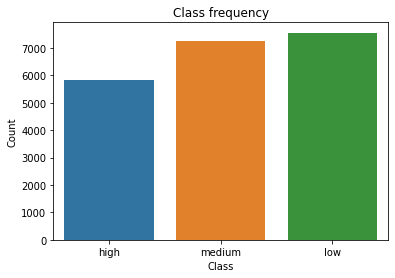

In [15]:
print('\nClass counts')
sns.countplot(x=data[var_decomp['target']])
plt.title('Class frequency')
plt.ylabel('Count')
plt.xlabel('Class')
plt.show()

In [16]:
print('\nFeature statistics by class')
class_stats = data.groupby('category').agg(['mean', 'std']).T
class_stats.columns.name = 'feature'
class_stats


Feature statistics by class


feature                 high          low       medium
MedInc     mean     5.532605     2.673141     3.782611
           std      2.287866     0.969989     1.167451
HouseAge   mean    30.425459    27.733060    28.148587
           std     13.268212    12.377765    12.083159
AveRooms   mean     5.944136     5.214153     5.238876
           std      2.531294     2.276853     2.563672
AveBedrms  mean     1.066603     1.133241     1.082753
           std      0.384602     0.486623     0.520791
Population mean  1360.630468  1374.039307  1531.148725
           std   1087.551874  1141.924608  1150.308040
AveOccup   mean     2.712094     3.343937     3.074120
           std      6.597825    15.861415     3.119585
Latitude   mean    35.440902    36.207704    35.185553
           std      1.875363     2.354927     1.950707
Longitude  mean  -119.859961  -119.596919  -119.308156
           std      2.019859     2.049929     1.905179


Principal Component Analysis (standardized)


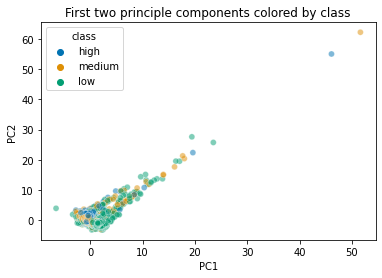

In [17]:
print('\nPrincipal Component Analysis (standardized)')
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

pca_std = Pipeline([
    ('scaling', StandardScaler()),
    ('pca', PCA(n_components=2))])
X_PCA = pd.DataFrame(pca_std.fit_transform(X[var_decomp['continuous']]))
X_PCA.columns = ['PC'+str(n+1) for n in range(X_PCA.shape[1])]

# palettes: https://seaborn.pydata.org/tutorial/color_palettes.html
sns.scatterplot(
    data=pd.concat((X_PCA, data[var_decomp['target']]), axis=1),
    x='PC1', y='PC2', hue=var_decomp['target'], palette='colorblind', alpha=0.5)
plt.title('First two principle components colored by class')
plt.legend(title='class')
plt.show()


Autoencoder


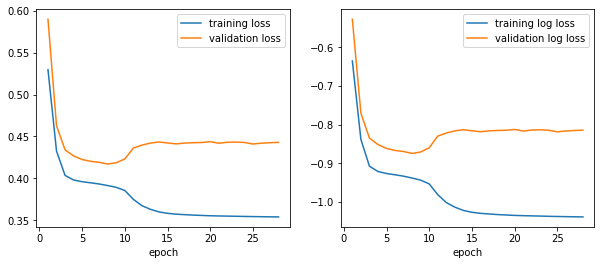

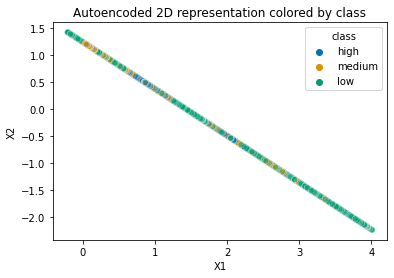

In [18]:
print('\nAutoencoder')
from tensorflow.keras import Model, Input, layers, callbacks
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_ae = ss.fit_transform(data[var_decomp['continuous']])
decoded_dim = X_train_ae.shape[1]
encoded_dim = 2
input_arr = Input(shape=(decoded_dim,))
x = layers.Dense(int(decoded_dim/4), activation='sigmoid')(input_arr)
x = layers.Dense(int(decoded_dim/4), activation='relu')(x)
encoded = layers.Dense(encoded_dim, activation='linear')(x)
x = layers.Dense(int(decoded_dim/4), activation='sigmoid')(encoded)
decoded = layers.Dense(decoded_dim, activation='linear')(x)

autoencoder = Model(input_arr, decoded)
autoencoder.compile(optimizer='adam', loss='mean_absolute_error')
early_stop = callbacks.EarlyStopping(patience=20, restore_best_weights=True)
ae_hist = autoencoder.fit(X_train_ae, X_train_ae, epochs=1000, batch_size=8, 
    callbacks=[early_stop], validation_split=0.2, verbose=0)
plot_losses(ae_hist.history)

encoder = Model(input_arr, encoded)
encoded_arr = encoder.predict(X_train_ae)

sns.scatterplot(
    data=pd.concat((pd.DataFrame(encoded_arr, columns=['X1', 'X2']), y), axis=1),
    x='X1', y='X2', hue=data[var_decomp['target']], palette='colorblind', alpha=0.5)
plt.title('Autoencoded 2D representation colored by class')
plt.legend(title='class')
plt.show()

In [21]:
# Clustering
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3)
k_means_clusters = k_means.fit_predict(data[var_decomp['continuous']])

# todo clustering evaluation

### 3.2 Split and Preprocessing

In [25]:
from sklearn.model_selection import train_test_split
X, y = data[var_decomp['features']], data[var_decomp['target']]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# trees are scale invariant, but neural networks require standardization
# in theory, trees do use (non-binary) categorical features
# however, sklearn's and xgboost's implementations in python do not support this

transformers = [
    ('standard_scaler', StandardScaler(), var_decomp['continuous']),
    ('ohe', OneHotEncoder(), var_decomp['categorical']),
    ('passthrough', 'passthrough', var_decomp['binary']+var_decomp['others'])]
ct = ColumnTransformer(transformers)
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

### 3.3 Evaluation Metrics

In [26]:
from sklearn import metrics
def clf_evaluate(y_test, y_pred):

    sorted_labels = sorted(y_test.unique())

    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred, labels=sorted_labels)
    metrics.ConfusionMatrixDisplay(cm, display_labels=sorted_labels).plot()
    plt.title('Confusion Matrix')
    plt.show()

    freqs = [sum(y_test==l)/len(y_test) for l in sorted_labels]
    accs = metrics.confusion_matrix(y_test, y_pred, labels=sorted_labels,
        normalize='true').diagonal()
    precs = metrics.precision_score(y_test, y_pred, labels=sorted_labels, average=None)
    recs = metrics.recall_score(y_test, y_pred, labels=sorted_labels, average=None)

    res = pd.DataFrame([freqs, accs, precs, recs],
        index=['Frequency', 'Accuracy', 'Precision', 'Recall'],
        columns=sorted_labels).T
    res.index.name = 'True Class'
    res = res.sort_values(by='Frequency', ascending=False)
    
    avgs = res.mean(axis=0)
    weighted_avgs = [res.iloc[:,i].dot(res.iloc[:,0]) for i in range(res.shape[1])]
    res = (res
        .append(pd.Series(avgs, index=res.columns, name='Class Average'))
        .append(pd.Series(weighted_avgs, index=res.columns, name='Weighted Average'))
        .round(4))
    res.loc[['Class Average', 'Weighted Average'],'Frequency'] = '-'
    
    print(f'\nAccuracy = {round(res.loc["Weighted Average", "Accuracy"], 4)}')
    print('\n', res)


### 3.4 Classifiers


Random Forest


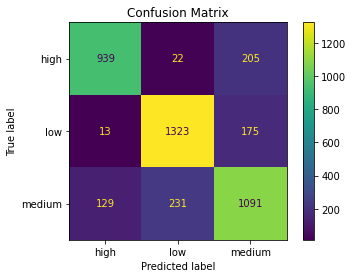


Accuracy = 0.8123

                  Frequency  Accuracy  Precision  Recall
True Class                                             
low                  0.366    0.8756     0.8395  0.8756
medium              0.3515    0.7519     0.7417  0.7519
high                0.2825    0.8053     0.8686  0.8053
Class Average            -    0.8109     0.8166  0.8109
Weighted Average         -    0.8123     0.8133  0.8123

XGBoost


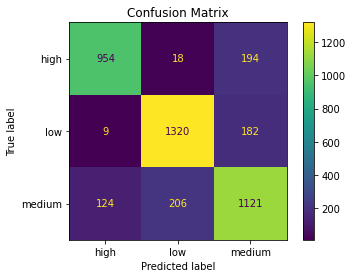


Accuracy = 0.8224

                  Frequency  Accuracy  Precision  Recall
True Class                                             
low                  0.366    0.8736     0.8549  0.8736
medium              0.3515    0.7726     0.7488  0.7726
high                0.2825    0.8182     0.8776  0.8182
Class Average            -    0.8214     0.8271  0.8214
Weighted Average         -    0.8224     0.8240  0.8224

Neural Network
Model: "clf_nn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 11)                132       
_________________________________________________________________
dense_10 (Dense)             (None, 22)                264       
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 69        
Total params: 465
Trainable params: 465
Non-trainable params: 0
_____________________________

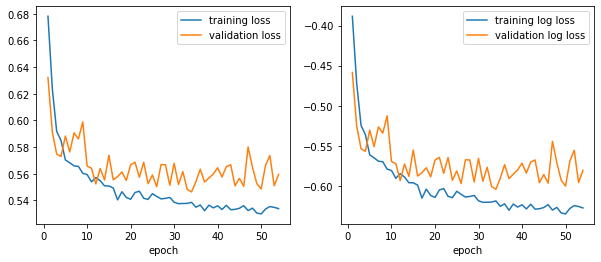

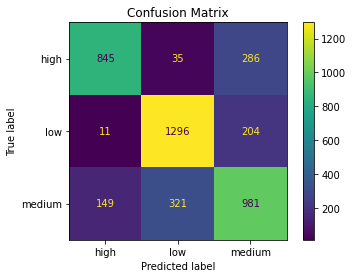


Accuracy = 0.7563

                  Frequency  Accuracy  Precision  Recall
True Class                                             
low                  0.366    0.8577     0.7845  0.8577
medium              0.3515    0.6761     0.6669  0.6761
high                0.2825    0.7247     0.8408  0.7247
Class Average            -    0.7528     0.7641  0.7528
Weighted Average         -    0.7563     0.7591  0.7563


In [27]:
print('\nRandom Forest')
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, criterion='gini')
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
clf_evaluate(y_test=y_test, y_pred=rf_pred)

# todo add lightgbm

print('\nXGBoost')
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV 

le = LabelEncoder() 
y_train_le = le.fit_transform(y_train)

param_grid = {
    'gamma': [0.1, 0.2, 0.3],
    'lambda': [0.4, 0.5, 0.6],
    'learning_rate': [0.1, 0.15, 0.2],
    'max_depth': [8, 10, 12]
    }

xgb = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False), 
    param_grid=param_grid, cv=5)
xgb.fit(X_train, y_train_le, eval_metric='mlogloss') # 'merror' for binary clf
cv_results = pd.DataFrame(xgb.cv_results_)
cv_results.loc[:,
    [c for c in cv_results.columns if c[0:6]=='param_'] +
    ['mean_test_score', 'std_test_score']]
xgb_pred = le.inverse_transform(xgb.predict(X_test))
clf_evaluate(y_test=y_test, y_pred=xgb_pred)

print('\nNeural Network')
from tensorflow.keras import Sequential, layers, optimizers, callbacks

# X is already scaled and one-hot-encoded (categ. features)
# however, y must be one-hot-encoded for the softmax layer
ohe = OneHotEncoder()
y_train_ohe = ohe.fit_transform(y_train.values.reshape(-1, 1)).toarray()

i_dim = X_train.shape[1]

clf_nn = Sequential(name='clf_nn')
clf_nn.add(layers.Dense(i_dim, activation='relu', input_shape=(i_dim,)))
clf_nn.add(layers.Dense(2*i_dim, activation='relu'))
clf_nn.add(layers.Dense(len(y_train.unique()), activation='softmax'))
clf_nn.summary()

adam = optimizers.Adam(learning_rate=0.01)
early_stop = callbacks.EarlyStopping(patience=20, restore_best_weights=True)
clf_nn.compile(optimizer=adam, loss='categorical_crossentropy')
hist = clf_nn.fit(
    x=X_train, y=y_train_ohe, epochs=1000, batch_size=8,
    callbacks=[early_stop],validation_split=0.2, verbose=0)
plot_losses(hist.history)
clf_nn_pred = ohe.inverse_transform(clf_nn.predict(X_test))
clf_evaluate(y_test=y_test, y_pred=clf_nn_pred)